# Single School Example

### Get Count.

In this case:
- `school_names` is set to `school_name`, which is USC for the example
- We have no processing pipeline
- We use the `one_query` to count the number of articles
- We create a `save_pattern` that defines how our `grouped_data` will be stored
- We use the *yearly* slice instead of the *monthly* slice to group by academic year 
- An `img_path` is set to save the output as a figure

grouped_data/csv/USC_Count.csv already exists.
grouped_data/pkl/yearly/USC_Count.pkl being read.


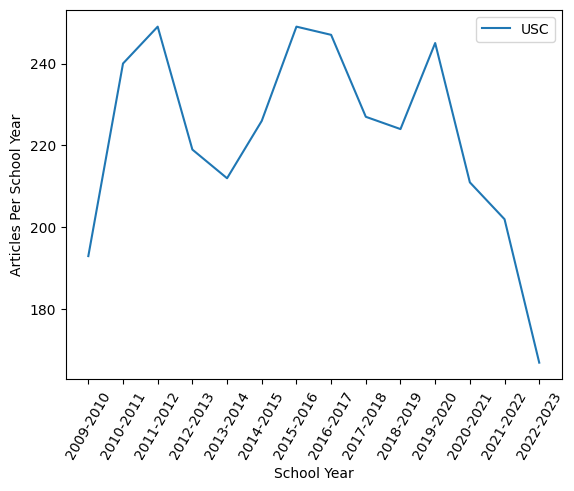

In [14]:
# Hyperparameters to Modify
school_name = 'USC'
time_slice = 'yearly'

from helpers.graphers import grapher
from helpers.queries import one_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

### Get Word Count Query.

Compared to the Count example the notable changes are:
- `string`, defining the word to be counted
- We use the `count_query` to count the number of articles with this string

grouped_data/csv/USC_Hillel.csv already exists.
grouped_data/pkl/monthly/USC_Hillel.pkl being created.


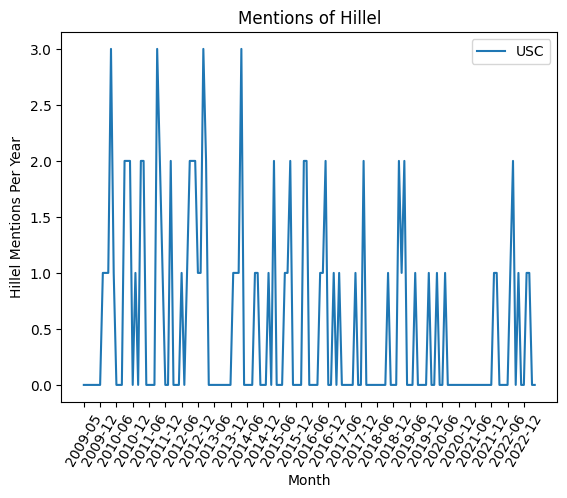

In [15]:
# Hyperparameters to Modify
school_name = 'USC'
string = "Hillel"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

# Article Counter

grouped_data/csv/UCSD_UF_UMich_USC_Count.csv already exists.
grouped_data/pkl/yearly/UCSD_UF_UMich_USC_Count.pkl being read.


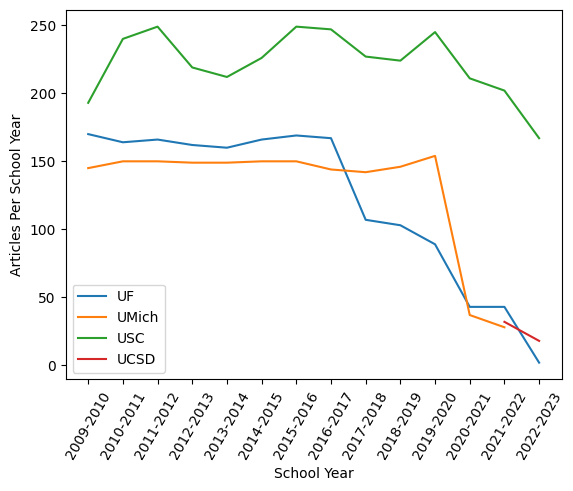

In [10]:
from helpers.graphers import grapher
from helpers.queries import one_query

import os

school_names = os.listdir('journal_data/txt')
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='yearly')

grouped_data/csv/UCSD_UF_UMich_USC_Count.csv already exists.
grouped_data/pkl/monthly/UCSD_UF_UMich_USC_Count.pkl being read.


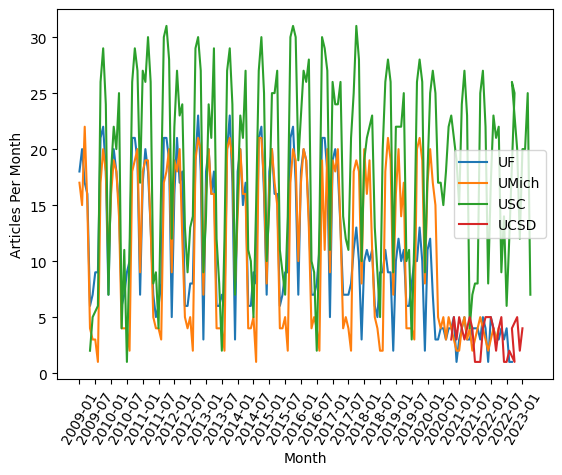

In [1]:
from helpers.graphers import grapher
from helpers.queries import one_query

import os

school_names = os.listdir('journal_data/txt')
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per Month",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='monthly')

# Mention Tracker

grouped_data/csv/UCSD_UF_UMich_USC_Hillel.csv already exists.
grouped_data/pkl/yearly/UCSD_UF_UMich_USC_Hillel.pkl being read.


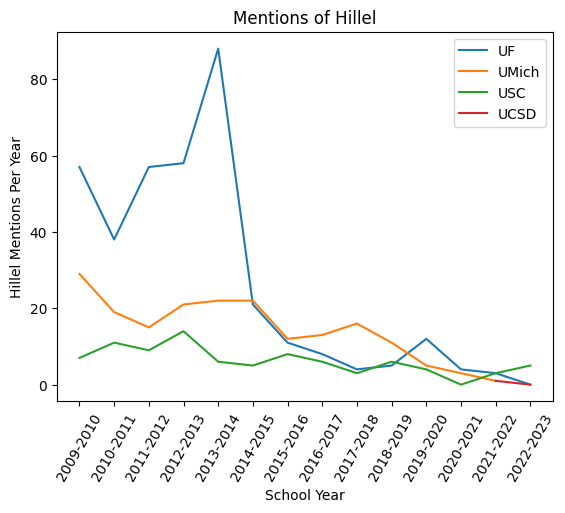

In [7]:
from helpers.graphers import grapher
from helpers.queries import count_query

import os

school_names = os.listdir('journal_data/txt')
string = "Hillel"
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='yearly',
        title=f"Mentions of {string}")

grouped_data/csv/UCSD_UF_UMich_USC_Israel.csv already exists.
grouped_data/pkl/yearly/UCSD_UF_UMich_USC_Israel.pkl being read.


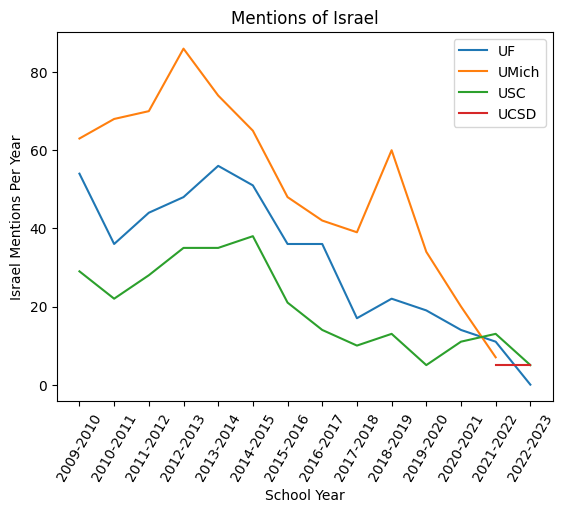

In [5]:
from helpers.graphers import grapher
from helpers.queries import count_query

import os

school_names = os.listdir('journal_data/txt')
string = "Israel"
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='yearly',
        title=f"Mentions of {string}")

grouped_data/csv/UCSD_UF_UMich_USC_Hillel.csv already exists.
grouped_data/pkl/monthly/UCSD_UF_UMich_USC_Hillel.pkl being read.


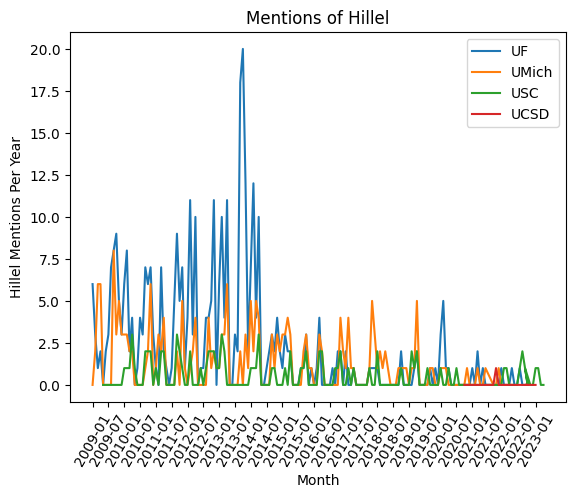

In [6]:
from helpers.graphers import grapher
from helpers.queries import count_query

import os

school_names = os.listdir('journal_data/txt')
string = "Hillel"
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='monthly',
        title=f"Mentions of {string}")

# Positive Count Grabber

In [1]:
# Load in the data
import nltk
nltk.download('wordnet')

from helpers.processors import csv_to_positive_articles
from helpers.processors import positive_articles_to_sentences
from helpers.processors import preprocess_text
import pandas as pd

csv_path = 'grouped_data/csv/'
ex_article = csv_path+'UCSD_UF_UMich_USC_Hillel.csv'
string = "Hillel"

df = csv_to_positive_articles(ex_article)

txt_list = positive_articles_to_sentences(df=df, string=string)
proc_txt_list = [preprocess_text(txt) for txt in txt_list]
process_checker = pd.DataFrame([txt_list, proc_txt_list]).transpose()
process_checker.columns = ["Raw", "Processed"]
process_checker.to_csv("example_processed_text.csv", index=False)